In [3]:
# general and data handling
import numpy as np
import pandas as pd
import os
from collections import Counter

# Required RDKit modules
import rdkit as rd
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import RDConfig
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdFingerprintGenerator
from rdkit import DataStructs
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.rdMolDescriptors import GetAtomPairFingerprint
from rdkit.Chem.AtomPairs import Torsions
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys

# modeling
import sklearn as sk
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import PCA
#from imblearn.over_sampling import ADASYN
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Graphing
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Import File:
mcf7 = pd.read_csv('V1/mcf7_V1.csv')
breast = pd.read_csv('V1/breast_V1.csv')
lung = pd.read_csv('V1/lung_V1.csv')
a549 = pd.read_csv('V1/a549_V1.csv')

In [5]:
print('MCF7 :',len(mcf7))
print('Breast :',len(breast))
print('Lung :',len(lung))
print('A549 :',len(a549))

MCF7 : 454
Breast : 538
Lung : 592
A549 : 375


In [6]:
mcf7["mol"] = [Chem.MolFromSmiles(x) for x in mcf7["CanonicalSMILES"]]
breast["mol"] = [Chem.MolFromSmiles(x) for x in breast["CanonicalSMILES"]]
lung["mol"] = [Chem.MolFromSmiles(x) for x in lung["CanonicalSMILES"]]
a549["mol"] = [Chem.MolFromSmiles(x) for x in a549["CanonicalSMILES"]]

In [7]:
print('MCF7 SMiles:',mcf7['CanonicalSMILES'].count())
print('Breast Smiles:',breast['CanonicalSMILES'].count())
print('lung Smiles:',lung['CanonicalSMILES'].count())
print('A549 Smiles:',a549['CanonicalSMILES'].count())

MCF7 SMiles: 454
Breast Smiles: 538
lung Smiles: 592
A549 Smiles: 375


In [8]:
# Maccs Fingerprint:
mcf7["Maccs"] = [MACCSkeys.GenMACCSKeys(x) for x in mcf7["mol"]]
breast["Maccs"] = [MACCSkeys.GenMACCSKeys(x) for x in breast["mol"]]
lung["Maccs"] = [MACCSkeys.GenMACCSKeys(x) for x in lung["mol"]]
a549["Maccs"] = [MACCSkeys.GenMACCSKeys(x) for x in a549["mol"]]

In [9]:
# Morgan 2 Fingerprint:
mcf7["morg2_fp"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in mcf7["mol"]]
breast["morg2_fp"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in breast["mol"]]
lung["morg2_fp"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in lung["mol"]]
a549["morg2_fp"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in a549["mol"]]

In [10]:
train_mcf7, test_mcf7 = train_test_split(mcf7, test_size=0.2, random_state=1,stratify=mcf7.Target.values)
train_breast, test_breast = train_test_split(breast, test_size=0.2, random_state=1,stratify=breast.Target.values)
train_lung, test_lung = train_test_split(lung, test_size=0.2, random_state=1,stratify=lung.Target.values)
train_a549, test_a549 = train_test_split(a549, test_size=0.2, random_state=1,stratify=a549.Target.values)

print('Training Data for MCF7:',len(train_mcf7),'\n')
print('Testing Data for MCF7:',len(test_mcf7),'\n')
print('***************************************************************************')
print('Training Data for Breast:',len(train_breast),'\n')
print('Testing Data for Breast:',len(test_breast),'\n')
print('***************************************************************************')
print('Training Data for lung:',len(train_lung),'\n')
print('Testing Data for lung:',len(test_lung),'\n')
print('***************************************************************************')
print('Training Data for a549:',len(train_a549),'\n')
print('Testing Data for a549:',len(test_a549),'\n')

Training Data for MCF7: 363 

Testing Data for MCF7: 91 

***************************************************************************
Training Data for Breast: 430 

Testing Data for Breast: 108 

***************************************************************************
Training Data for lung: 473 

Testing Data for lung: 119 

***************************************************************************
Training Data for a549: 300 

Testing Data for a549: 75 



In [11]:
def Counting(y):
    unique, counts = np.unique(y, return_counts=True)
    a=dict(zip(unique, counts))
    return str(a)

In [12]:
print('Train Set for MCF7 has:',Counting(train_mcf7['Target']))
print('Test Set for MCF7 has:',Counting(test_mcf7['Target']))
print('*********************************************************************')
print('Train Set for Breast has:',Counting(train_breast['Target']))
print('Test Set for Breast has:',Counting(test_breast['Target']))
print('*********************************************************************')
print('Train Set for Lung has:',Counting(train_lung['Target']))
print('Test Set for Lung has:',Counting(test_lung['Target']))
print('*********************************************************************')
print('Train Set for A549 has:',Counting(train_a549['Target']))
print('Test Set for A549 has:',Counting(test_a549['Target']))

Train Set for MCF7 has: {0: 204, 1: 159}
Test Set for MCF7 has: {0: 51, 1: 40}
*********************************************************************
Train Set for Breast has: {0: 236, 1: 194}
Test Set for Breast has: {0: 59, 1: 49}
*********************************************************************
Train Set for Lung has: {0: 249, 1: 224}
Test Set for Lung has: {0: 63, 1: 56}
*********************************************************************
Train Set for A549 has: {0: 157, 1: 143}
Test Set for A549 has: {0: 39, 1: 36}


In [13]:
def to_bit(fps):
    fp_np = []
    for fp in fps:
        arr = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fp, arr)
        fp_np.append(arr)
    test = fp_np
    return test

### Maccs:

In [14]:
# MACCS Fingreprint:  # MCF7
X_Macc_train_mcf7=to_bit(train_mcf7['Maccs'])
y_Macc_train_mcf7=train_mcf7.Target.values

X_Macc_test_mcf7=to_bit(test_mcf7['Maccs'])
y_Macc_test_mcf7=test_mcf7.Target.values

In [15]:
# MACCS Fingreprint:  #Breast
X_Macc_train_breast=to_bit(train_breast['Maccs'])
y_Macc_train_breast=train_breast.Target.values

X_Macc_test_breast=to_bit(test_breast['Maccs'])
y_Macc_test_breast=test_breast.Target.values

In [16]:
# MACCS Fingreprint:  # Lung
X_Macc_train_lung=to_bit(train_lung['Maccs'])
y_Macc_train_lung=train_lung.Target.values

X_Macc_test_lung=to_bit(test_lung['Maccs'])
y_Macc_test_lung=test_lung.Target.values

In [17]:
# MACCS Fingreprint:  # A549
X_Macc_train_a549=to_bit(train_a549['Maccs'])
y_Macc_train_a549=train_a549.Target.values

X_Macc_test_a549=to_bit(test_a549['Maccs'])
y_Macc_test_a549=test_a549.Target.values

### Morgan2:

In [18]:
# Morgan 2 Fingreprint:   #MCF7
X_Morgan2_train_mcf7=to_bit(train_mcf7['morg2_fp'])
y_Morgan2_train_mcf7=train_mcf7.Target.values

X_Morgan2_test_mcf7=to_bit(test_mcf7['morg2_fp'])
y_Morgan2_test_mcf7=test_mcf7.Target.values

In [19]:
# Morgan 2 Fingreprint:  #Breast
X_Morgan2_train_breast=to_bit(train_breast['morg2_fp'])
y_Morgan2_train_breast=train_breast.Target.values

X_Morgan2_test_breast=to_bit(test_breast['morg2_fp'])
y_Morgan2_test_breast=test_breast.Target.values

In [20]:
# Morgan 2 Fingreprint:   #Lung
X_Morgan2_train_lung=to_bit(train_lung['morg2_fp'])
y_Morgan2_train_lung=train_lung.Target.values

X_Morgan2_test_lung=to_bit(test_lung['morg2_fp'])
y_Morgan2_test_lung=test_lung.Target.values

In [21]:
# Morgan 2 Fingreprint:   #A549
X_Morgan2_train_a549=to_bit(train_a549['morg2_fp'])
y_Morgan2_train_a549=train_a549.Target.values

X_Morgan2_test_a549=to_bit(test_a549['morg2_fp'])
y_Morgan2_test_a549=test_a549.Target.values

### Models:

<ol>
<li>Random forest (RF)</li>
<li>SVM</li>
<li>KNN</li>
<li>eXtreme Gradient Boosting (XGBoost)</li>
</ol>

In [22]:
def permonce_measure(y_test,y_pred):
    print("Accuracy Score:", round(accuracy_score(y_test, y_pred),3))
    print('Balanced Accuracy:',round(balanced_accuracy_score(y_test,y_pred),3))
    print("MCC Score:",round(matthews_corrcoef(y_test, y_pred),3))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    a3= Sensitivity = tp/(tp+fn)
    a4= Specificity = tn/(tn+fp)
    print("Sensitivity Score:",round(a3,3))
    print("Specificity Score:",round(a4,3))
    
    test_measure = {"Accuracy_test":round(accuracy_score(y_test, y_pred),3),
                    "Balanced Accuracy_test":round(balanced_accuracy_score(y_test,y_pred),3),
                    "MCC Score_test":round(matthews_corrcoef(y_test, y_pred),3),
                    "Sensitivity Score_test":round(a3,3),
                    "Specificity Score_test":round(a4,3)
                   }
    score=accuracy_score(y_test, y_pred)
    cm_macc_test = metrics.confusion_matrix(y_test, y_pred)
    #Graph:
    print('\n********************** Graph *****************************\n')
    plt.figure(figsize=(5,5))
    sns.heatmap(cm_macc_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    return test_measure

def roc_auc(y_val,prediction_probs,model_name):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_val))]
    # keep probabilities for the positive outcome only
    prediction_probs = prediction_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_val, ns_probs)
    prediction_probs_auc = roc_auc_score(y_val, prediction_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('ROC AUC=%.3f' % (prediction_probs_auc))
    roc_auc = {"AUC_Score_test":round(prediction_probs_auc,3)}
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
    prediction_probs_fpr, prediction_probs_tpr, _ = roc_curve(y_val, prediction_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(prediction_probs_fpr, prediction_probs_tpr, marker='.', label=model_name)
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    return roc_auc

def cv_result(best_model,X_train,y_train):
    scoring={'accuracy':'accuracy',
            'balanced_accuracy':'balanced_accuracy',
            'roc_auc':'roc_auc',
            'specificity':make_scorer(recall_score,pos_label=0),
            'sensitivity':make_scorer(recall_score,pos_label=1),
            'MCC':make_scorer(matthews_corrcoef)}
    cv=cross_validate(best_model,X_train,y_train, cv=5,scoring=scoring)
    cv_df=pd.DataFrame(cv)
    Mean={'Accuracy':round(cv['test_accuracy'].mean(),3),
          'Balanced Accuracy':round(cv['test_balanced_accuracy'].mean(),3),
          'AUC_Score':round(cv['test_roc_auc'].mean(),3),
          'Specificity':round(cv['test_specificity'].mean(),3),
          'Sensitivity':round(cv['test_sensitivity'].mean(),3),
          'MCC':round(cv['test_MCC'].mean(),3)
         }
    print('Accuracy:',round(cv['test_accuracy'].mean(),3),'\nBalanced_accuracy:',round(cv['test_balanced_accuracy'].mean(),3),'\nAUC_Score:',round(cv['test_roc_auc'].mean(),3),'\nSpecificity:',round(cv['test_specificity'].mean(),3),'\nSensitivity:',round(cv['test_sensitivity'].mean(),3),'\nMCC:',round(cv['test_MCC'].mean(),3))
    return cv_df,Mean

## XgBoost:

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef,accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,balanced_accuracy_score,recall_score,make_scorer
from sklearn.model_selection import cross_validate
from matplotlib import pyplot
from xgboost import XGBClassifier

In [24]:
# XGB:
xgb = XGBClassifier(use_label_encoder=False,random_state=1,eval_metric='error')

In [25]:
# Parameter:
param_grid_xgb = {
        'n_estimators':[int(x) for x in range(10,101)],
        'gamma':[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
        }

## For Maccs:

#### For MCF7

In [71]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_xgb_mcf7_maccs = GridSearchCV(estimator = xgb, param_grid = param_grid_xgb, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_xgb_mcf7_maccs.fit(np.array(X_Macc_train_mcf7), y_Macc_train_mcf7,eval_metric='error')
print('\n******************************** Done *****************************************************')
MCF7_Maccs_xgb=pd.DataFrame(grid_search_xgb_mcf7_maccs.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 1001 candidates, totalling 5005 fits

******************************** Done *****************************************************
CPU times: user 11 s, sys: 730 ms, total: 11.7 s
Wall time: 10min 19s


In [72]:
print('  Best Parameter are:\n',grid_search_xgb_mcf7_maccs.best_estimator_)

  Best Parameter are:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=45, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


In [73]:
best_model_xgb_MCF7_Maccs = grid_search_xgb_mcf7_maccs.best_estimator_
#best_model_xgb_MCF7_Maccs=XGBClassifier(use_label_encoder=False,n_estimators=73,gamma=0,random_state=1,eval_metric='error')

In [74]:
xgb_mcf7_maccs_cv,xgb_mcf7_maccs_mean=cv_result(best_model_xgb_MCF7_Maccs,np.array(X_Macc_train_mcf7),y_Macc_train_mcf7)

Accuracy: 0.774 
Balanced_accuracy: 0.772 
AUC_Score: 0.86 
Specificity: 0.784 
Sensitivity: 0.761 
MCC: 0.549


In [75]:
xgb_mcf7_maccs_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.134565,0.019334,0.808219,0.801829,0.887957,0.853659,0.750000,0.608784
1,0.124719,0.010360,0.808219,0.812119,0.900915,0.780488,0.843750,0.619534
2,0.066986,0.005631,0.698630,0.687119,0.801829,0.780488,0.593750,0.381882
3,0.058448,0.005395,0.819444,0.809992,0.892998,0.878049,0.741935,0.629721
4,0.057537,0.005363,0.736111,0.750000,0.814844,0.625000,0.875000,0.506573


#### MCF7 Test Set:

Accuracy Score: 0.758
Balanced Accuracy: 0.757
MCC Score: 0.512
Sensitivity Score: 0.75
Specificity Score: 0.765

********************** Graph *****************************



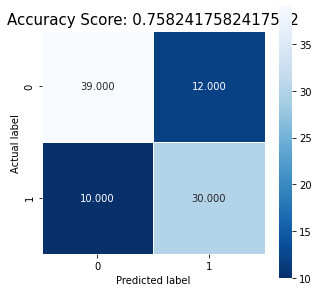

In [76]:
best_model_xgb_MCF7_Maccs.fit(np.array(X_Macc_train_mcf7), y_Macc_train_mcf7,eval_metric='error')
prediction_mcf7_maccs_xgb=best_model_xgb_MCF7_Maccs.predict(np.array(X_Macc_test_mcf7))
xgb_test_mcf7_maccs=permonce_measure(y_Macc_test_mcf7,prediction_mcf7_maccs_xgb)

No Skill: ROC AUC=0.500
ROC AUC=0.810


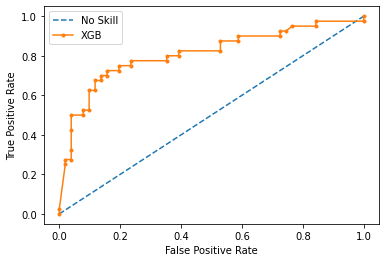

In [77]:
prediction_mcf7_maccs_xgb_probs = best_model_xgb_MCF7_Maccs.predict_proba(np.array(X_Macc_test_mcf7))
roc_auc_mcf7_maccs=roc_auc(y_Macc_test_mcf7,prediction_mcf7_maccs_xgb_probs,'XGB')
xgb_test_mcf7_maccs.update(roc_auc_mcf7_maccs)

In [78]:
#MCF7_Maccs_xgb.to_csv('MCF7_Maccs_xgb_auc.csv',index=False)

--------------------------------------------------------------------------------------------------------------------

### For Breast:

In [79]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_xgb_breast_maccs = GridSearchCV(estimator = xgb, param_grid = param_grid_xgb, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_xgb_breast_maccs.fit(np.array(X_Macc_train_breast), y_Macc_train_breast,eval_metric='error')
print('\n******************************** Done *****************************************************')
Breast_Maccs_xgb=pd.DataFrame(grid_search_xgb_breast_maccs.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 1001 candidates, totalling 5005 fits

******************************** Done *****************************************************
CPU times: user 10.8 s, sys: 854 ms, total: 11.7 s
Wall time: 14min 59s


In [80]:
print('  Best Parameter are:\n',grid_search_xgb_breast_maccs.best_estimator_)

  Best Parameter are:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=36, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


In [81]:
best_model_xgb_Breast_Maccs = grid_search_xgb_breast_maccs.best_estimator_
#best_model_xgb_Breast_Maccs= XGBClassifier(use_label_encoder=False,n_estimators=11,gamma=1,random_state=1,eval_metric='error')

In [82]:
xgb_breast_maccs_cv,xgb_breast_maccs_mean=cv_result(best_model_xgb_Breast_Maccs,np.array(X_Macc_train_breast),y_Macc_train_breast)

Accuracy: 0.772 
Balanced_accuracy: 0.768 
AUC_Score: 0.829 
Specificity: 0.805 
Sensitivity: 0.731 
MCC: 0.541


In [83]:
xgb_breast_maccs_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.172497,0.010958,0.790698,0.795417,0.868249,0.744681,0.846154,0.588910
1,0.099829,0.014941,0.779070,0.773868,0.800873,0.829787,0.717949,0.552734
2,0.065142,0.005663,0.825581,0.822968,0.872340,0.851064,0.794872,0.647527
3,0.052454,0.005440,0.720930,0.718494,0.813421,0.744681,0.692308,0.436989
4,0.056177,0.005433,0.744186,0.729715,0.791118,0.854167,0.605263,0.478715


#### Breast Test Set:

Accuracy Score: 0.778
Balanced Accuracy: 0.776
MCC Score: 0.552
Sensitivity Score: 0.755
Specificity Score: 0.797

********************** Graph *****************************



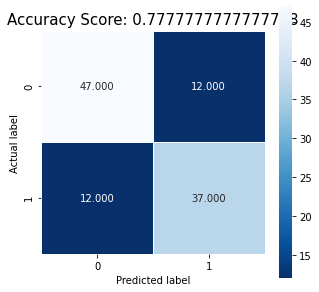

In [84]:
best_model_xgb_Breast_Maccs.fit(np.array(X_Macc_train_breast), y_Macc_train_breast,eval_metric='error')
prediction_breast_maccs_xgb=best_model_xgb_Breast_Maccs.predict(np.array(X_Macc_test_breast))
xgb_test_breast_maccs = permonce_measure(y_Macc_test_breast,prediction_breast_maccs_xgb)

No Skill: ROC AUC=0.500
ROC AUC=0.844


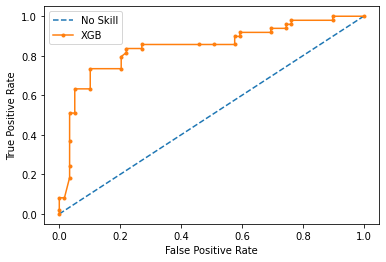

In [85]:
prediction_breast_maccs_xgb_probs = best_model_xgb_Breast_Maccs.predict_proba(np.array(X_Macc_test_breast))
roc_auc_breast_maccs=roc_auc(y_Macc_test_breast,prediction_breast_maccs_xgb_probs,'XGB')
xgb_test_breast_maccs.update(roc_auc_breast_maccs)

In [86]:
#Breast_Maccs_xgb.to_csv('Breast_Maccs_xgb_auc.csv',index=False)

--------------------------------------------------------------------------------------------------------------------

### For Lung:

In [87]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_xgb_lung_maccs = GridSearchCV(estimator = xgb, param_grid = param_grid_xgb, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_xgb_lung_maccs.fit(np.array(X_Macc_train_lung), y_Macc_train_lung,eval_metric='error')
print('\n******************************** Done *****************************************************')
Lung_Maccs_xgb=pd.DataFrame(grid_search_xgb_lung_maccs.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 1001 candidates, totalling 5005 fits

******************************** Done *****************************************************
CPU times: user 11.5 s, sys: 844 ms, total: 12.4 s
Wall time: 16min 24s


In [88]:
#Lung_Maccs_xgb.to_csv('Lung_Maccs_xgb_auc.csv',index=False)

In [89]:
print('  Best Parameter are:\n',grid_search_xgb_lung_maccs.best_estimator_)

  Best Parameter are:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=58, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


In [90]:
best_model_xgb_Lung_Maccs = grid_search_xgb_lung_maccs.best_estimator_
#best_model_xgb_Lung_Maccs= XGBClassifier(use_label_encoder=False,n_estimators=10,gamma=3,random_state=1,eval_metric='error')

In [91]:
xgb_lung_maccs_cv,xgb_lung_maccs_mean=cv_result(best_model_xgb_Lung_Maccs,np.array(X_Macc_train_lung),y_Macc_train_lung)

Accuracy: 0.695 
Balanced_accuracy: 0.694 
AUC_Score: 0.743 
Specificity: 0.731 
Sensitivity: 0.656 
MCC: 0.391


In [92]:
xgb_lung_maccs_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.238724,0.014035,0.673684,0.673333,0.714000,0.680000,0.666667,0.346359
1,0.162282,0.005578,0.800000,0.794444,0.882000,0.900000,0.688889,0.606104
2,0.089651,0.005586,0.673684,0.672222,0.736222,0.700000,0.644444,0.344905
3,0.089175,0.005594,0.648936,0.646939,0.692971,0.693878,0.600000,0.295287
4,0.087874,0.005573,0.680851,0.680909,0.687727,0.680000,0.681818,0.361162


#### Lung Test Set:

Accuracy Score: 0.697
Balanced Accuracy: 0.689
MCC Score: 0.396
Sensitivity Score: 0.554
Specificity Score: 0.825

********************** Graph *****************************



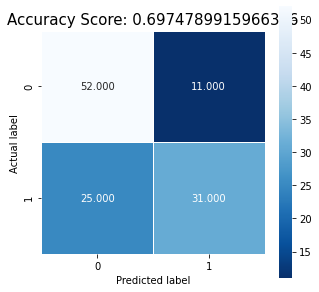

In [93]:
best_model_xgb_Lung_Maccs.fit(np.array(X_Macc_train_lung), y_Macc_train_lung,eval_metric='error')
prediction_lung_maccs_xgb = best_model_xgb_Lung_Maccs.predict(np.array(X_Macc_test_lung))
xgb_test_lung_maccs=permonce_measure(y_Macc_test_lung,prediction_lung_maccs_xgb)

No Skill: ROC AUC=0.500
ROC AUC=0.804


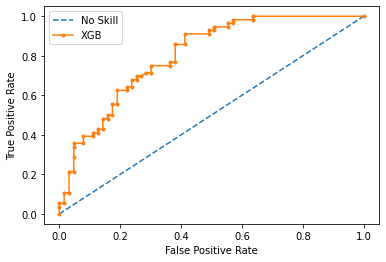

In [94]:
prediction_lung_maccs_xgb_probs = best_model_xgb_Lung_Maccs.predict_proba(np.array(X_Macc_test_lung))
roc_auc_lung_maccs=roc_auc(y_Macc_test_lung,prediction_lung_maccs_xgb_probs,'XGB')
xgb_test_lung_maccs.update(roc_auc_lung_maccs)

--------------------------------------------------------------------------------------------------------------------

### For A549:

In [95]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_xgb_a549_maccs = GridSearchCV(estimator = xgb, param_grid = param_grid_xgb, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_xgb_a549_maccs.fit(np.array(X_Macc_train_a549), y_Macc_train_a549,eval_metric='error')
print('\n******************************** Done *****************************************************')
A549_Maccs_xgb = pd.DataFrame(grid_search_xgb_a549_maccs.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 1001 candidates, totalling 5005 fits

******************************** Done *****************************************************
CPU times: user 10.2 s, sys: 563 ms, total: 10.8 s
Wall time: 10min 24s


In [96]:
#A549_Maccs_xgb.to_csv('A549_Maccs_xgb_auc.csv',index=False)

In [97]:
print('  Best Parameter are:\n',grid_search_xgb_a549_maccs.best_estimator_)

  Best Parameter are:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0.5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


In [98]:
best_model_xgb_A549_Maccs = grid_search_xgb_a549_maccs.best_estimator_
#best_model_xgb_A549_Maccs = XGBClassifier(use_label_encoder=False,n_estimators=10,gamma=2.5,random_state=1,eval_metric='error')

In [99]:
xgb_a549_maccs_cv,xgb_a549_maccs_mean=cv_result(best_model_xgb_A549_Maccs,np.array(X_Macc_train_a549),y_Macc_train_a549)

Accuracy: 0.713 
Balanced_accuracy: 0.713 
AUC_Score: 0.8 
Specificity: 0.726 
Sensitivity: 0.699 
MCC: 0.427


In [100]:
xgb_a549_maccs_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.040676,0.011158,0.716667,0.718750,0.854353,0.687500,0.750000,0.436769
1,0.027637,0.004927,0.683333,0.680804,0.766741,0.718750,0.642857,0.362620
2,0.015113,0.004964,0.750000,0.751390,0.811457,0.709677,0.793103,0.503622
3,0.021710,0.005157,0.583333,0.581201,0.689655,0.645161,0.517241,0.163775
4,0.010676,0.005015,0.833333,0.832036,0.878754,0.870968,0.793103,0.667046


#### A549 Test Set:

Accuracy Score: 0.64
Balanced Accuracy: 0.64
MCC Score: 0.28
Sensitivity Score: 0.639
Specificity Score: 0.641

********************** Graph *****************************



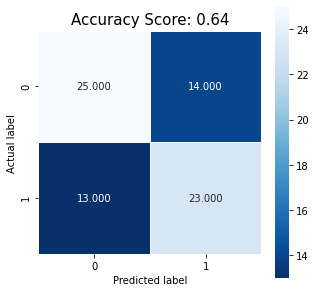

In [101]:
best_model_xgb_A549_Maccs.fit(np.array(X_Macc_train_a549), y_Macc_train_a549,eval_metric='error')
prediction_a549_maccs_xgb = best_model_xgb_A549_Maccs.predict(np.array(X_Macc_test_a549))
xgb_test_a549_maccs=permonce_measure(y_Macc_test_a549,prediction_a549_maccs_xgb)

No Skill: ROC AUC=0.500
ROC AUC=0.749


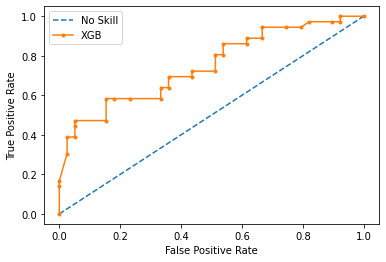

In [102]:
prediction_a549_maccs_xgb_probs = best_model_xgb_A549_Maccs.predict_proba(np.array(X_Macc_test_a549))
roc_auc_a549_maccs=roc_auc(y_Macc_test_a549,prediction_a549_maccs_xgb_probs,'XGB')
xgb_test_a549_maccs.update(roc_auc_a549_maccs)

---------------------------------------------------------------------------------------------------------------------

## For Morgan2:

### For MCF7:

In [103]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_xgb_mcf7_morgan2 = GridSearchCV(estimator = xgb, param_grid = param_grid_xgb, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_xgb_mcf7_morgan2.fit(np.array(X_Morgan2_train_mcf7), y_Morgan2_train_mcf7,eval_metric='error')
print('\n******************************** Done ******************************************************')
MCF7_Morgan2_xgb = pd.DataFrame(grid_search_xgb_mcf7_morgan2.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 1001 candidates, totalling 5005 fits

******************************** Done ******************************************************
CPU times: user 10.8 s, sys: 495 ms, total: 11.3 s
Wall time: 31min 15s


In [104]:
#MCF7_Morgan2_xgb.to_csv('MCF7_Morgan2_xgb_auc.csv',index=False)

In [105]:
print('  Best Parameter are:\n',grid_search_xgb_mcf7_morgan2.best_estimator_)

  Best Parameter are:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=42, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


In [106]:
best_model_xgb_MCF7_Morgan2 = grid_search_xgb_mcf7_morgan2.best_estimator_
#best_model_xgb_MCF7_Morgan2 = XGBClassifier(use_label_encoder=False,n_estimators=30,gamma=1,random_state=1,eval_metric='error')

In [107]:
xgb_mcf7_morgan2_cv,xgb_mcf7_morgan2_mean=cv_result(best_model_xgb_MCF7_Morgan2,np.array(X_Morgan2_train_mcf7),y_Morgan2_train_mcf7)

Accuracy: 0.805 
Balanced_accuracy: 0.795 
AUC_Score: 0.841 
Specificity: 0.872 
Sensitivity: 0.717 
MCC: 0.603


In [108]:
xgb_mcf7_morgan2_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.164082,0.006659,0.808219,0.798399,0.826220,0.878049,0.718750,0.608989
1,0.140296,0.006425,0.780822,0.770579,0.837652,0.853659,0.687500,0.552212
2,0.144617,0.006256,0.767123,0.754954,0.824695,0.853659,0.656250,0.524081
3,0.136331,0.006445,0.847222,0.830448,0.906373,0.951220,0.709677,0.694193
4,0.136139,0.006227,0.819444,0.818750,0.812109,0.825000,0.812500,0.635764


#### Test set for MCF7:

Accuracy Score: 0.747
Balanced Accuracy: 0.737
MCC Score: 0.483
Sensitivity Score: 0.65
Specificity Score: 0.824

********************** Graph *****************************



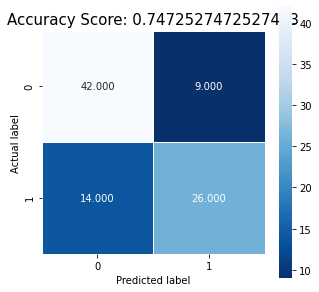

In [109]:
best_model_xgb_MCF7_Morgan2.fit(np.array(X_Morgan2_train_mcf7), y_Morgan2_train_mcf7,eval_metric='error')
prediction_mcf7_morgan2_xgb = best_model_xgb_MCF7_Morgan2.predict(np.array(X_Morgan2_test_mcf7))
xgb_test_mcf7_morgan2 = permonce_measure(y_Morgan2_test_mcf7,prediction_mcf7_morgan2_xgb)

No Skill: ROC AUC=0.500
ROC AUC=0.814


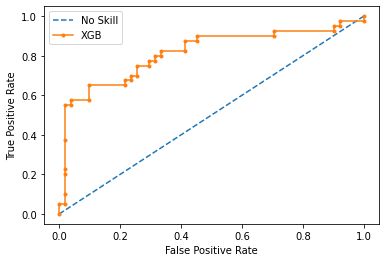

In [110]:
prediction_mcf7_morgan2_xgb_probs = best_model_xgb_MCF7_Morgan2.predict_proba(np.array(X_Morgan2_test_mcf7))
roc_auc_mcf7_morgan2=roc_auc(y_Morgan2_test_mcf7,prediction_mcf7_morgan2_xgb_probs,'XGB')
xgb_test_mcf7_morgan2.update(roc_auc_mcf7_morgan2)

-------------------------------------------------------------------------------------------------------------------

### For Breast:

In [111]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_xgb_breast_morgan2 = GridSearchCV(estimator = xgb, param_grid = param_grid_xgb, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_xgb_breast_morgan2.fit(np.array(X_Morgan2_train_breast), y_Morgan2_train_breast)
print('\n******************************** Done ******************************************************')
Breast_Morgan2_xgb = pd.DataFrame(grid_search_xgb_breast_morgan2.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 1001 candidates, totalling 5005 fits

******************************** Done ******************************************************
CPU times: user 11.4 s, sys: 424 ms, total: 11.8 s
Wall time: 34min 1s


In [112]:
#Breast_Morgan2_xgb.to_csv('Breast_Morgan2_xgb_auc.csv',index=False)

In [113]:
print('  Best Parameter are:\n',grid_search_xgb_breast_morgan2.best_estimator_)

  Best Parameter are:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=72, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


In [114]:
best_model_xgb_Breast_Morgan2 = grid_search_xgb_breast_morgan2.best_estimator_
#best_model_xgb_Breast_Morgan2 = XGBClassifier(use_label_encoder=False,n_estimators=30,gamma=0.5,random_state=1,eval_metric='error')

In [115]:
xgb_breast_morgan2_cv,xgb_breast_morgan2_mean=cv_result(best_model_xgb_Breast_Morgan2,np.array(X_Morgan2_train_breast),y_Morgan2_train_breast)

Accuracy: 0.772 
Balanced_accuracy: 0.767 
AUC_Score: 0.849 
Specificity: 0.818 
Sensitivity: 0.716 
MCC: 0.543


In [116]:
xgb_breast_morgan2_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.320578,0.006943,0.790698,0.797600,0.897163,0.723404,0.871795,0.595199
1,0.260162,0.006905,0.744186,0.733224,0.784506,0.851064,0.615385,0.483641
2,0.260720,0.006861,0.802326,0.799509,0.911075,0.829787,0.769231,0.600494
3,0.264010,0.006873,0.790698,0.788871,0.858702,0.808511,0.769231,0.577741
4,0.274411,0.006878,0.732558,0.713816,0.794956,0.875000,0.552632,0.457588


#### Test set for Breast:

Accuracy Score: 0.787
Balanced Accuracy: 0.784
MCC Score: 0.57
Sensitivity Score: 0.755
Specificity Score: 0.814

********************** Graph *****************************



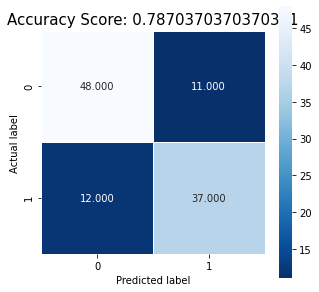

In [117]:
best_model_xgb_Breast_Morgan2.fit(np.array(X_Morgan2_train_breast), y_Morgan2_train_breast,eval_metric='error')
prediction_breast_morgan2_xgb = best_model_xgb_Breast_Morgan2.predict(np.array(X_Morgan2_test_breast))
xgb_test_breast_morgan2 = permonce_measure(y_Morgan2_test_breast,prediction_breast_morgan2_xgb)

No Skill: ROC AUC=0.500
ROC AUC=0.836


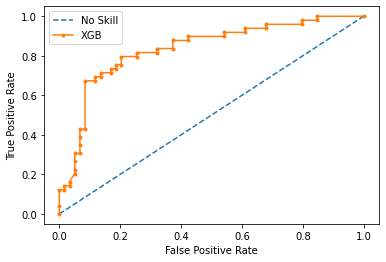

In [118]:
prediction_breast_morgan2_xgb_probs = best_model_xgb_Breast_Morgan2.predict_proba(np.array(X_Morgan2_test_breast))
roc_auc_breast_morgan2 = roc_auc(y_Morgan2_test_breast,prediction_breast_morgan2_xgb_probs,'XGB')
xgb_test_breast_morgan2.update(roc_auc_breast_morgan2)

--------------------------------------------------------------------------------------------------------------------

### For Lung:

In [119]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_xgb_lung_morgan2 = GridSearchCV(estimator = xgb, param_grid = param_grid_xgb, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_xgb_lung_morgan2.fit(np.array(X_Morgan2_train_lung), y_Morgan2_train_lung,eval_metric='error')
print('\n******************************** Done ******************************************************')
Lung_Morgan2_xgb = pd.DataFrame(grid_search_xgb_lung_morgan2.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 1001 candidates, totalling 5005 fits

******************************** Done ******************************************************
CPU times: user 12 s, sys: 487 ms, total: 12.5 s
Wall time: 37min 6s


In [120]:
#Lung_Morgan2_xgb.to_csv('Lung_Morgan2_xgb_auc.csv',index=False)

In [121]:
print('  Best Parameter are:\n',grid_search_xgb_lung_morgan2.best_estimator_)

  Best Parameter are:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=94, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


In [122]:
best_model_xgb_Lung_Morgan2 = grid_search_xgb_lung_morgan2.best_estimator_
#best_model_xgb_Lung_Morgan2= XGBClassifier(use_label_encoder=False,n_estimators=44,gamma=1,random_state=1,eval_metric='error')

In [123]:
xgb_lung_morgan2_cv,xgb_lung_morgan2_mean=cv_result(best_model_xgb_Lung_Morgan2,np.array(X_Morgan2_train_lung),y_Morgan2_train_lung)

Accuracy: 0.706 
Balanced_accuracy: 0.704 
AUC_Score: 0.775 
Specificity: 0.751 
Sensitivity: 0.656 
MCC: 0.411


In [124]:
xgb_lung_morgan2_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.437511,0.007142,0.663158,0.664444,0.752444,0.640000,0.688889,0.328597
1,0.372480,0.006908,0.747368,0.742222,0.833333,0.840000,0.644444,0.496044
2,0.388614,0.006887,0.705263,0.702222,0.704000,0.760000,0.644444,0.407719
3,0.371045,0.006864,0.691489,0.689569,0.773696,0.734694,0.644444,0.380957
4,0.370021,0.006921,0.723404,0.719545,0.813636,0.780000,0.659091,0.443138


#### Test set for Lung:

Accuracy Score: 0.706
Balanced Accuracy: 0.703
MCC Score: 0.408
Sensitivity Score: 0.661
Specificity Score: 0.746

********************** Graph *****************************



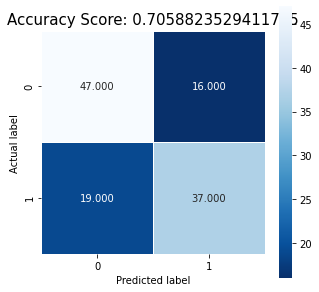

In [125]:
best_model_xgb_Lung_Morgan2.fit(np.array(X_Morgan2_train_lung), y_Morgan2_train_lung,eval_metric='error')
prediction_lung_morgan2_xgb = best_model_xgb_Lung_Morgan2.predict(np.array(X_Morgan2_test_lung))
xgb_test_lung_morgan2 = permonce_measure(y_Morgan2_test_lung,prediction_lung_morgan2_xgb)

No Skill: ROC AUC=0.500
ROC AUC=0.796


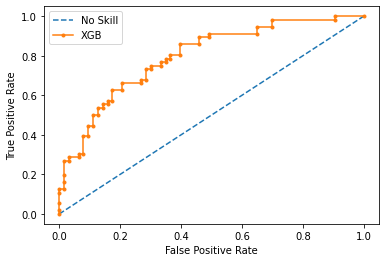

In [126]:
prediction_lung_morgan2_xgb_probs = best_model_xgb_Lung_Morgan2.predict_proba(np.array(X_Morgan2_test_lung))
roc_auc_lung_morgan2 = roc_auc(y_Morgan2_test_lung,prediction_lung_morgan2_xgb_probs,'XGB')
xgb_test_lung_morgan2.update(roc_auc_lung_morgan2)

---------------------------------------------------------------------------------------------------------------------

### For A549:

In [127]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_xgb_a549_morgan2 = GridSearchCV(estimator = xgb, param_grid = param_grid_xgb, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_xgb_a549_morgan2.fit(np.array(X_Morgan2_train_a549), y_Morgan2_train_a549,eval_metric='error')
print('\n******************************** Done ******************************************************')
A549_Morgan2_xgb = pd.DataFrame(grid_search_xgb_a549_morgan2.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 1001 candidates, totalling 5005 fits

******************************** Done ******************************************************
CPU times: user 10.7 s, sys: 542 ms, total: 11.3 s
Wall time: 27min 43s


In [128]:
#A549_Morgan2_xgb.to_csv('A549_Morgan2_knn_auc.csv',index=False)

In [129]:
print('  Best Parameter are:\n',grid_search_xgb_a549_morgan2.best_estimator_)

  Best Parameter are:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=59, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


In [27]:
best_model_xgb_A549_Morgan2 = grid_search_xgb_a549_morgan2.best_estimator_
#best_model_xgb_A549_Morgan2 = XGBClassifier(use_label_encoder=False,n_estimators=73,gamma=1,random_state=1,eval_metric='error')

In [28]:
xgb_a549_morgan2_cv,xgb_a549_morgan2_mean=cv_result(best_model_xgb_A549_Morgan2,np.array(X_Morgan2_train_a549),y_Morgan2_train_a549)

Accuracy: 0.747 
Balanced_accuracy: 0.746 
AUC_Score: 0.803 
Specificity: 0.765 
Sensitivity: 0.728 
MCC: 0.497


In [29]:
xgb_a549_morgan2_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.277288,0.006870,0.750000,0.752232,0.829799,0.718750,0.785714,0.503622
1,0.262079,0.006299,0.766667,0.767857,0.823661,0.750000,0.785714,0.534522
2,0.191590,0.006091,0.683333,0.684650,0.770857,0.645161,0.724138,0.369917
3,0.211342,0.006433,0.733333,0.729700,0.721913,0.838710,0.620690,0.472178
4,0.171736,0.006378,0.800000,0.797553,0.866518,0.870968,0.724138,0.603212


#### Test set for A549:

Accuracy Score: 0.72
Balanced Accuracy: 0.723
MCC Score: 0.451
Sensitivity Score: 0.806
Specificity Score: 0.641

********************** Graph *****************************



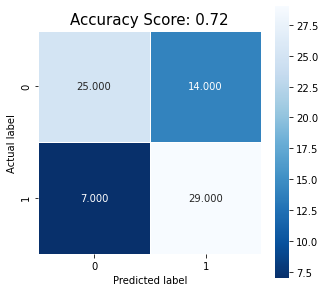

In [30]:
best_model_xgb_A549_Morgan2.fit(np.array(X_Morgan2_train_a549), y_Morgan2_train_a549,eval_metric='error')
prediction_a549_morgan2_xgb = best_model_xgb_A549_Morgan2.predict(np.array(X_Morgan2_test_a549))
xgb_test_a549_morgan2 = permonce_measure(y_Morgan2_test_a549,prediction_a549_morgan2_xgb)

No Skill: ROC AUC=0.500
ROC AUC=0.819


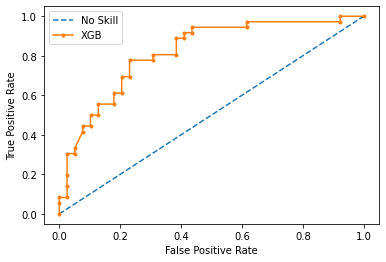

In [31]:
prediction_a549_morgan2_xgb_probs = best_model_xgb_A549_Morgan2.predict_proba(np.array(X_Morgan2_test_a549))
roc_auc_a549_morgan2 = roc_auc(y_Morgan2_test_a549,prediction_a549_morgan2_xgb_probs,'XGB')
xgb_test_a549_morgan2.update(roc_auc_a549_morgan2)

## EnD!

In [135]:
Model = pd.DataFrame({'Model':['XGB_MCF7_MACCS','XGB_Breast_MACCS','XGB_Lung_MACCS','XGB_A549_MACCS','XGB_MCF7_MORGAN2','XGB_Breast_MORGAN2','XGB_Lung_MORGAN2','XGB_A549_MORGAN2']})
parameters=pd.DataFrame([grid_search_xgb_mcf7_maccs.best_params_,grid_search_xgb_breast_maccs.best_params_,grid_search_xgb_lung_maccs.best_params_,grid_search_xgb_a549_maccs.best_params_,grid_search_xgb_mcf7_morgan2.best_params_,grid_search_xgb_breast_morgan2.best_params_,grid_search_xgb_lung_morgan2.best_params_,grid_search_xgb_a549_morgan2.best_params_])
test_set=pd.DataFrame([xgb_test_mcf7_maccs,xgb_test_breast_maccs,xgb_test_lung_maccs,xgb_test_a549_maccs,xgb_test_mcf7_morgan2,xgb_test_breast_morgan2,xgb_test_lung_morgan2,xgb_test_a549_morgan2])
cv_set=pd.DataFrame([xgb_mcf7_maccs_mean,xgb_breast_maccs_mean,xgb_lung_maccs_mean,xgb_a549_maccs_mean,xgb_mcf7_morgan2_mean,xgb_breast_morgan2_mean,xgb_lung_morgan2_mean,xgb_a549_morgan2_mean])
final_result=pd.concat([Model,parameters,cv_set,test_set],axis=1)
final_result

,Model,gamma,n_estimators,Accuracy,Balanced Accuracy,AUC_Score,Specificity,Sensitivity,MCC,Accuracy_test,Balanced Accuracy_test,MCC Score_test,Sensitivity Score_test,Specificity Score_test,AUC_Score_test
0,XGB_MCF7_MACCS,0.0,45,0.774,0.772,0.860,0.784,0.761,0.549,0.758,0.757,0.512,0.750,0.765,0.810
1,XGB_Breast_MACCS,0.0,36,0.772,0.768,0.829,0.805,0.731,0.541,0.778,0.776,0.552,0.755,0.797,0.844
2,XGB_Lung_MACCS,0.0,58,0.695,0.694,0.743,0.731,0.656,0.391,0.697,0.689,0.396,0.554,0.825,0.804
3,XGB_A549_MACCS,0.5,10,0.713,0.713,0.800,0.726,0.699,0.427,0.640,0.640,0.280,0.639,0.641,0.749
4,XGB_MCF7_MORGAN2,0.0,42,0.805,0.795,0.841,0.872,0.717,0.603,0.747,0.737,0.483,0.650,0.824,0.814
5,XGB_Breast_MORGAN2,0.0,72,0.772,0.767,0.849,0.818,0.716,0.543,0.787,0.784,0.570,0.755,0.814,0.836
6,XGB_Lung_MORGAN2,0.0,94,0.706,0.704,0.775,0.751,0.656,0.411,0.706,0.703,0.408,0.661,0.746,0.796
7,XGB_A549_MORGAN2,0.0,59,0.710,0.708,0.794,0.758,0.658,0.420,0.773,0.775,0.549,0.806,0.744,0.839
